### Week 5

#### Megna P <ee21b085@smail.iitm.ac.in>

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [3]:
def generate_line(x1, y1, x2, y2, num_points):
                if round(100 * x2) / 100 == round(100 * x1) / 100:
                                # line is vertical
                                x_samples = np.ones(num_points - 2) * x1
                                y_samples = np.linspace(y1, y2, num_points)
                                y_samples = np.delete(y_samples, [0, -1])
                else:
                                m = (y2 - y1) / (x2 - x1)
                                c = y1 - m * x1
                                x_samples = np.linspace(x1, x2, num_points)
                                x_samples = np.delete(x_samples, [0, -1])
                                y_samples = (x_samples * m) + c
                return x_samples, y_samples

> This is for generating lines between two choosen points.

In [4]:
def polygon(n, r):
                angles = np.linspace(0 * np.pi, 2 * np.pi, n + 1)
                num_points_per_side = int((840 + n) / n)
                x_corners = r * np.cos(angles)[0:n]
                y_corners = r * np.sin(angles)[0:n]
                x_polygon = [x_corners[-1]]
                y_polygon = [y_corners[-1]]
                for i in range(-1, len(x_corners) - 1):
                                temp_x, temp_y = generate_line(x_corners[i], y_corners[i],x_corners[i + 1], y_corners[i + 1],num_points_per_side)
                                x_polygon += list(temp_x)
                                y_polygon += list(temp_y)
                                x_polygon.append(x_corners[i + 1])
                                y_polygon.append(y_corners[i + 1])
                x_polygon.pop()
                y_polygon.pop()
                return np.array(x_polygon), np.array(y_polygon)

> This function is used to generate a polygon of n-sides. The total no. of point taken will be 1680 , for one side we will take 840 points construct the polygons accordingly.

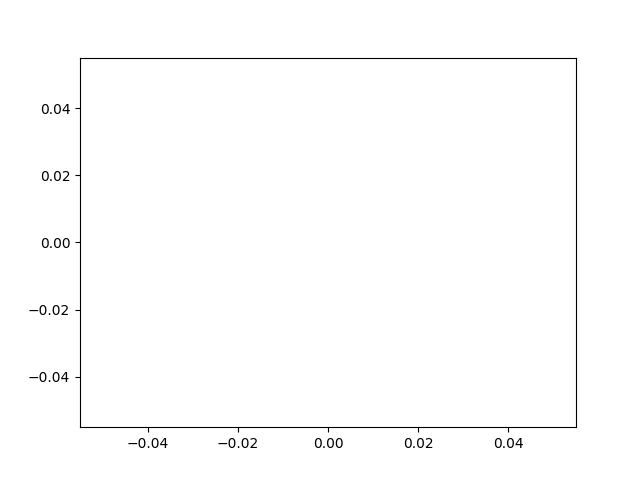

In [5]:
def morph(x1,y1,x2,y2,t):
                xm=x2*(1-t)+x1*t
                ym=y2*(1-t)+y1*t
                return xm,ym
            
xt,yt=polygon(3,1)
xs,ys=polygon(4,1)
xp,yp=polygon(5,1)
xh,yh=polygon(6,1)
xhp,yhp=polygon(7,1)
xo,yo=polygon(8,1)

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'b')
def init():
              ax.set_xlim(-1.2, 1.2)
              ax.set_ylim(-1.2, 1.2)
              return ln,
def mod(x):
            y=x-int(x)
            return y
def update(frame):
            if frame>=0 and frame<1:
                                xd,yd=morph(xs,ys,xt,yt,mod(frame))
            if frame>=1 and frame<2:
                                xd,yd=morph(xp,yp,xs,ys,mod(frame))
            if frame>=2 and frame<3:
                                xd,yd=morph(xh,yh,xp,yp,mod(frame))
            if frame>=3 and frame<4:
                                xd,yd=morph(xhp,yhp,xh,yh,mod(frame))
            if frame>=4 and frame<5:
                                xd,yd=morph(xo,yo,xhp,yhp,mod(frame))
            if frame>=5 and frame<6:
                                xd,yd=morph(xhp,yhp,xo,yo,mod(frame))
            if frame>=6 and frame<7:
                                xd,yd=morph(xh,yh,xhp,yhp,mod(frame))
            if frame>=7 and frame<8:
                                xd,yd=morph(xp,yp,xh,yh,mod(frame))
            if frame>=8 and frame<9:
                                xd,yd=morph(xs,ys,xp,yp,mod(frame))
            if frame>=9 and frame<10:
                                xd,yd=morph(xt,yt,xs,ys,mod(frame))
            ln.set_data(xd,yd)
            return ln,
anim = FuncAnimation(fig, update, frames=np.linspace(0, 10, 900),init_func=init, blit=True, interval=20, repeat=True)
plt.show()